# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif
sns.set_palette("muted") 
sns.set_style("white")
sns.set_context("talk")
sns.set_palette("pastel")

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [2]:
df = pd.read_csv('bank_fin.csv', sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,"1,00 $",yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,"733,00 $",no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,"29,00 $",no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0 $,no,yes,cellular,8,may,9,2,172,5,failure,no


<div style="background-color: #000000;
    color: #FF69B4;
    padding: 20px;
    margin-top: 20px;
    margin-bottom: 20px;
    border: 1px solid #404040;">
<p><strong>Данные о клиентах банка:</strong></p>
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li><span style="color: #00FF00; font-family: Courier New, courier;">age</span> (возраст);</li>
<li><span style="color: #00FF00; font-family: Courier New, courier;">job</span> (сфера занятости);</li>
<li><span style="color: #00FF00; font-family: Courier New, courier;">marital</span> (семейное положение);</li>
<li><span style="color: #00FF00; font-family: Courier New, courier;">education</span> (уровень образования);</li>
<li><span style="color: #00FF00; font-family: Courier New, courier;">default</span> (имеется ли просроченный кредит);</li>
<li><span style="color: #00FF00; font-family: Courier New, courier;">housing</span> (имеется ли кредит на жильё);</li>
<li><span style="color: #00FF00; font-family: Courier New, courier;">loan</span> (имеется ли кредит на личные нужды);</li>
<li><span style="color: #00FF00; font-family: Courier New, courier;">balance</span> (баланс).</li>
</ul>
</ul>
<p></p>
<p><strong>Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:</strong></p>
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li><span style="color: #00FF00; font-family: Courier New, courier;">contact</span> (тип контакта с клиентом);</li>
<li><span style="color: #00FF00; font-family: Courier New, courier;">month</span> (месяц, в котором был последний контакт);</li>
<li><span style="color: #00FF00; font-family: Courier New, courier;">day</span> (день, в который был последний контакт);</li>
<li><span style="color: #00FF00; font-family: Courier New, courier;">duration</span> (продолжительность контакта в секундах).</li>
</ul>
</ul>
<p></p>
<p><strong>Прочие признаки:</strong></p>
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li><span style="color: #00FF00; font-family: Courier New, courier;">campaign</span> (количество контактов с этим клиентом в течение текущей кампании);</li>
<li><span style="color: #00FF00; font-family: Courier New, courier;">pdays</span> (количество пропущенных дней с момента последней маркетинговой кампании до контакта в&nbsp;текущей кампании);</li>
<li><span style="color: #00FF00; font-family: Courier New, courier;">previous</span> (количество контактов до текущей кампании)</li>
<li><span style="color: #00FF00; font-family: Courier New, courier;">poutcome</span> (результат прошлой маркетинговой кампании).</li>
</ul>
</ul>
<p></p>
<p>И, разумеется, наша <strong>целевая переменная</strong> <span style="color: #00FF00; font-family: Courier New, courier;">deposit</span>, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.</p>
</div>

In [3]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
df.info()
print(df[df['balance'].isnull()].shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB
25


### Задание 2

In [4]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

### Задание 3

In [5]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance'] = df['balance'].apply(lambda a: float(a.replace('$', '').replace(' ', '').replace(',', '.')) if isinstance(a, str) else a)
avg_balance = df['balance'].mean().__round__(3)
print(avg_balance)

1529.129


### Задание 4

In [6]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
df.loc[(df['balance'].isna()), ['balance']] = df['balance'].median()
df['balance'].mean().__round__(3)

1526.936

### Задание 5

In [7]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
df.loc[df['job']=='unknown', ['job']] = df['job'].mode()[0]
df.loc[df['education']=='unknown', ['education']] = df['education'].mode()[0]

# Средний баланс с самыми популярными образованием и работой
mask = (df['job'] == df['job'].mode()[0]) & (df['education'] == df['education'].mode()[0])
df.loc[mask, ['balance']].mean().__round__(3)

balance    1598.883
dtype: float64

### Задание 6

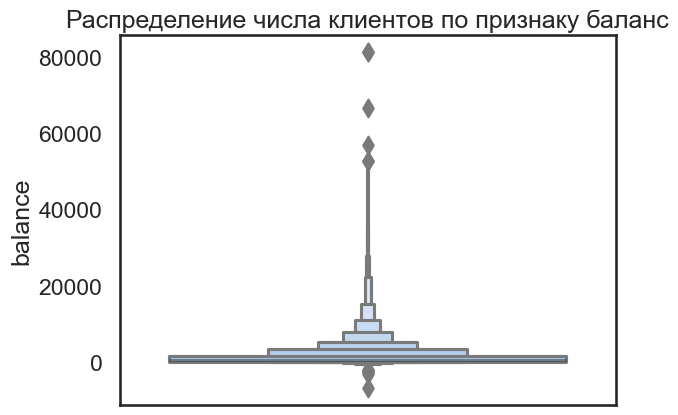

lower_bound: -2241, 
upper_bound: 4063


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,33,blue-collar,single,primary,no,1.0,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
10101,39,services,married,secondary,no,733.0,no,no,unknown,16,jun,83,4,-1,0,unknown,no
10102,32,technician,single,secondary,no,29.0,no,no,cellular,19,aug,156,2,-1,0,unknown,no
10103,43,technician,married,secondary,no,0.0,no,yes,cellular,8,may,9,2,172,5,failure,no


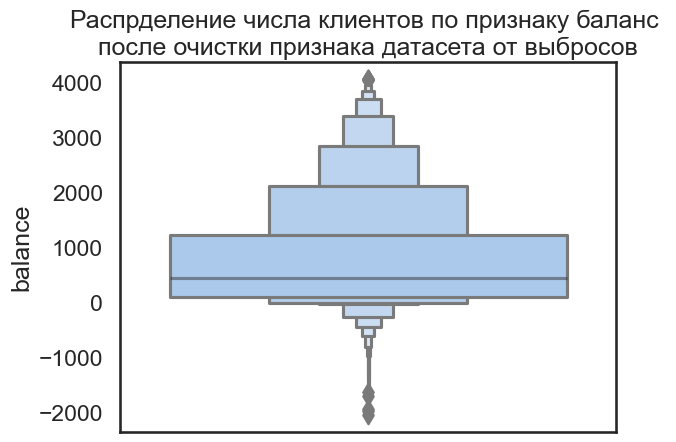

In [8]:
# удалите все выбросы для признака balance
plt.figure()
pl = sns.boxenplot(y = df['balance'])
plt.title('Распределение числа клиентов по признаку баланс')
plt.show()

def outliers_iqr (data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - 1.5*iqr
    upper_bound = quartile_3 + 1.5*iqr
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return lower_bound, upper_bound, outliers, cleaned

lower_bound, upper_bound, outliers, cleaned = outliers_iqr (df, 'balance')
print (f'lower_bound: {int(lower_bound)}, \nupper_bound: {int(upper_bound)}')

df = cleaned.reset_index(drop = True)
display(df)

# Взглянем на график распределения после очистки Датасета 
plt.figure()
pl = sns.boxenplot(y = df['balance'])
plt.title('Распрделение числа клиентов по признаку баланс \nпосле очистки признака датасета от выбросов')
plt.show();

По графику видно что признак имеет выбросы. По методу Тьюки были выявлены верхняя и нижняя границы. Датасет очищен от выбросов по признаку "Баланс"

## Часть 2:  Разведывательный анализ

### Задание 1

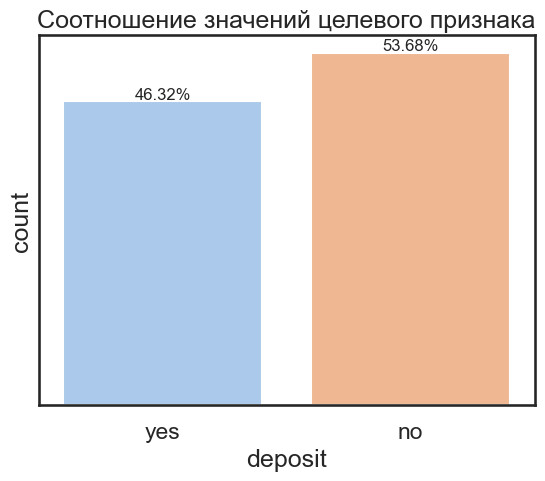

4681 клиентов открыли депозит
5424 клиентов отказались открыть депозит


In [9]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
plt.figure()
ax = sns.countplot(x = df['deposit'])
plt.title('Соотношение значений целевого признака')
plt.yticks([])
# Добавление значений поверх столбцов
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{height / total * 100:.2f}%'  # Форматирование процентов
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0,5),  # Вертикальное смещение текста
                textcoords='offset points', 
                ha='center', va='center',
                fontsize = 12)

plt.show();

print(f'{(df["deposit"].value_counts().iloc[1])} клиентов открыли депозит\n{(df["deposit"].value_counts().iloc[0])} клиентов отказались открыть депозит')

### Задания 2 и 3

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


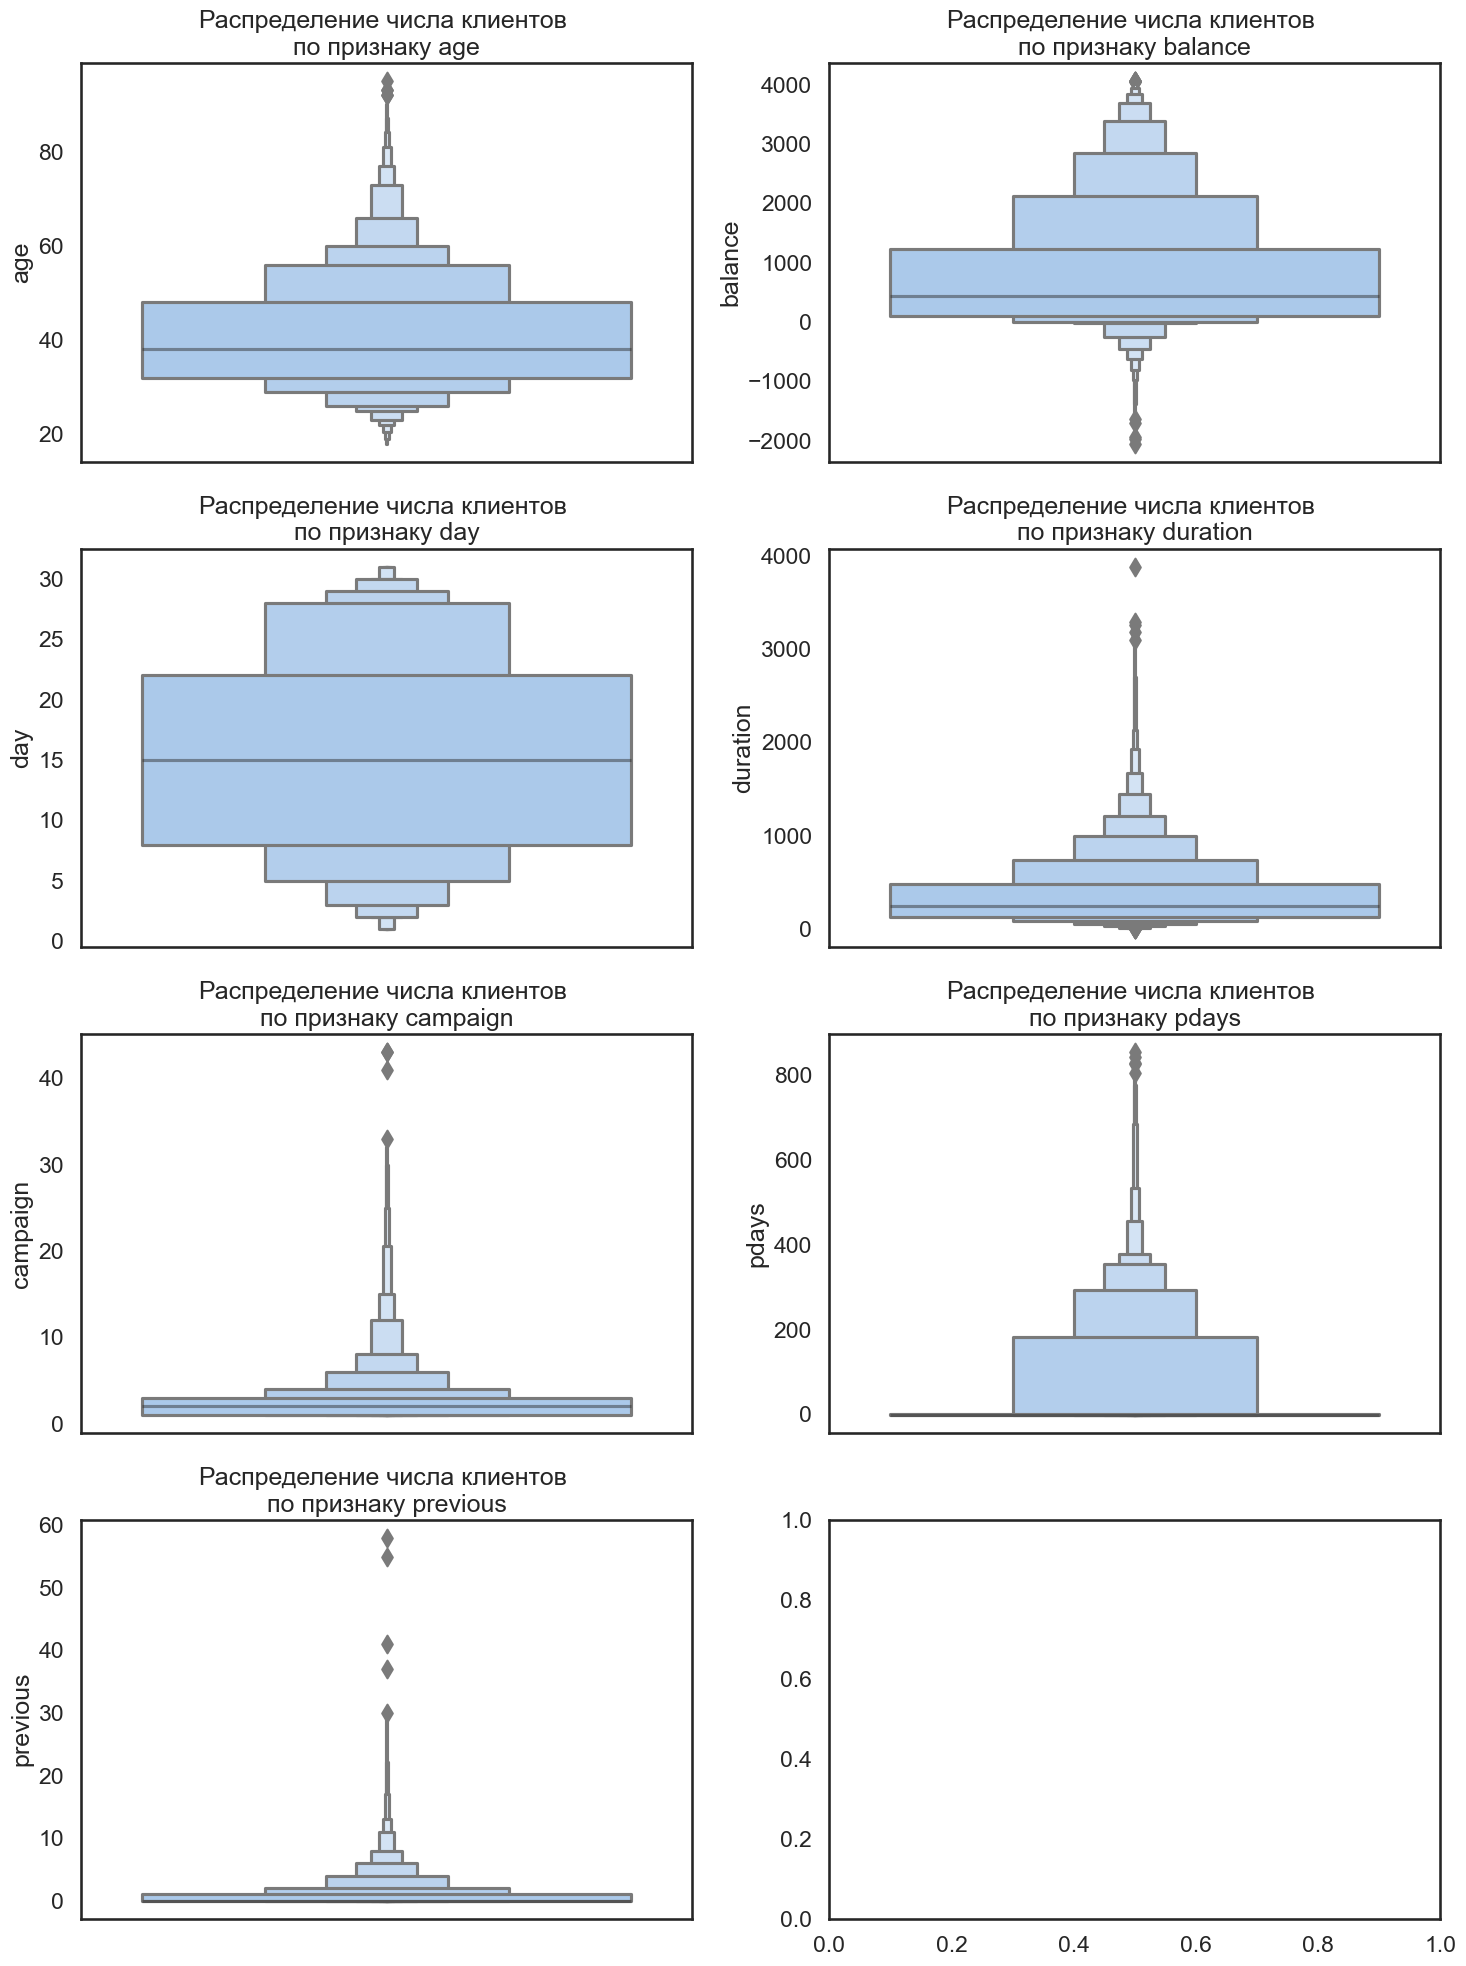

Максимальный возраст клиента банка: 95


In [10]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
display(df.describe())

cols = df.describe().columns

# Расчет количества строк для графиков
l = int(len(cols)/2) + 1

# Создание фигуры и осей
fig, axes = plt.subplots(l, 2, figsize=(15, l * 5))

# Плоский массив для доступа к осям по одномерному индексу
axes = axes.flatten()

# Построение графиков
for i, col in enumerate(cols):
    # sns.violinplot(y=df[col], color= "#CBEDDD" , alpha=0.5, ax=axes[i])
    sns.boxenplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Распределение числа клиентов \nпо признаку {col}')
    
plt.tight_layout()
plt.show()

# Максимальный возраст клиента банка
print(f'Максимальный возраст клиента банка: {df["age"].max()}');

Признаки 'duration', 'campaign', 'pdays', 'previous' имеют выбросы и ненормальное распределение.

### Задания 4 и 5

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


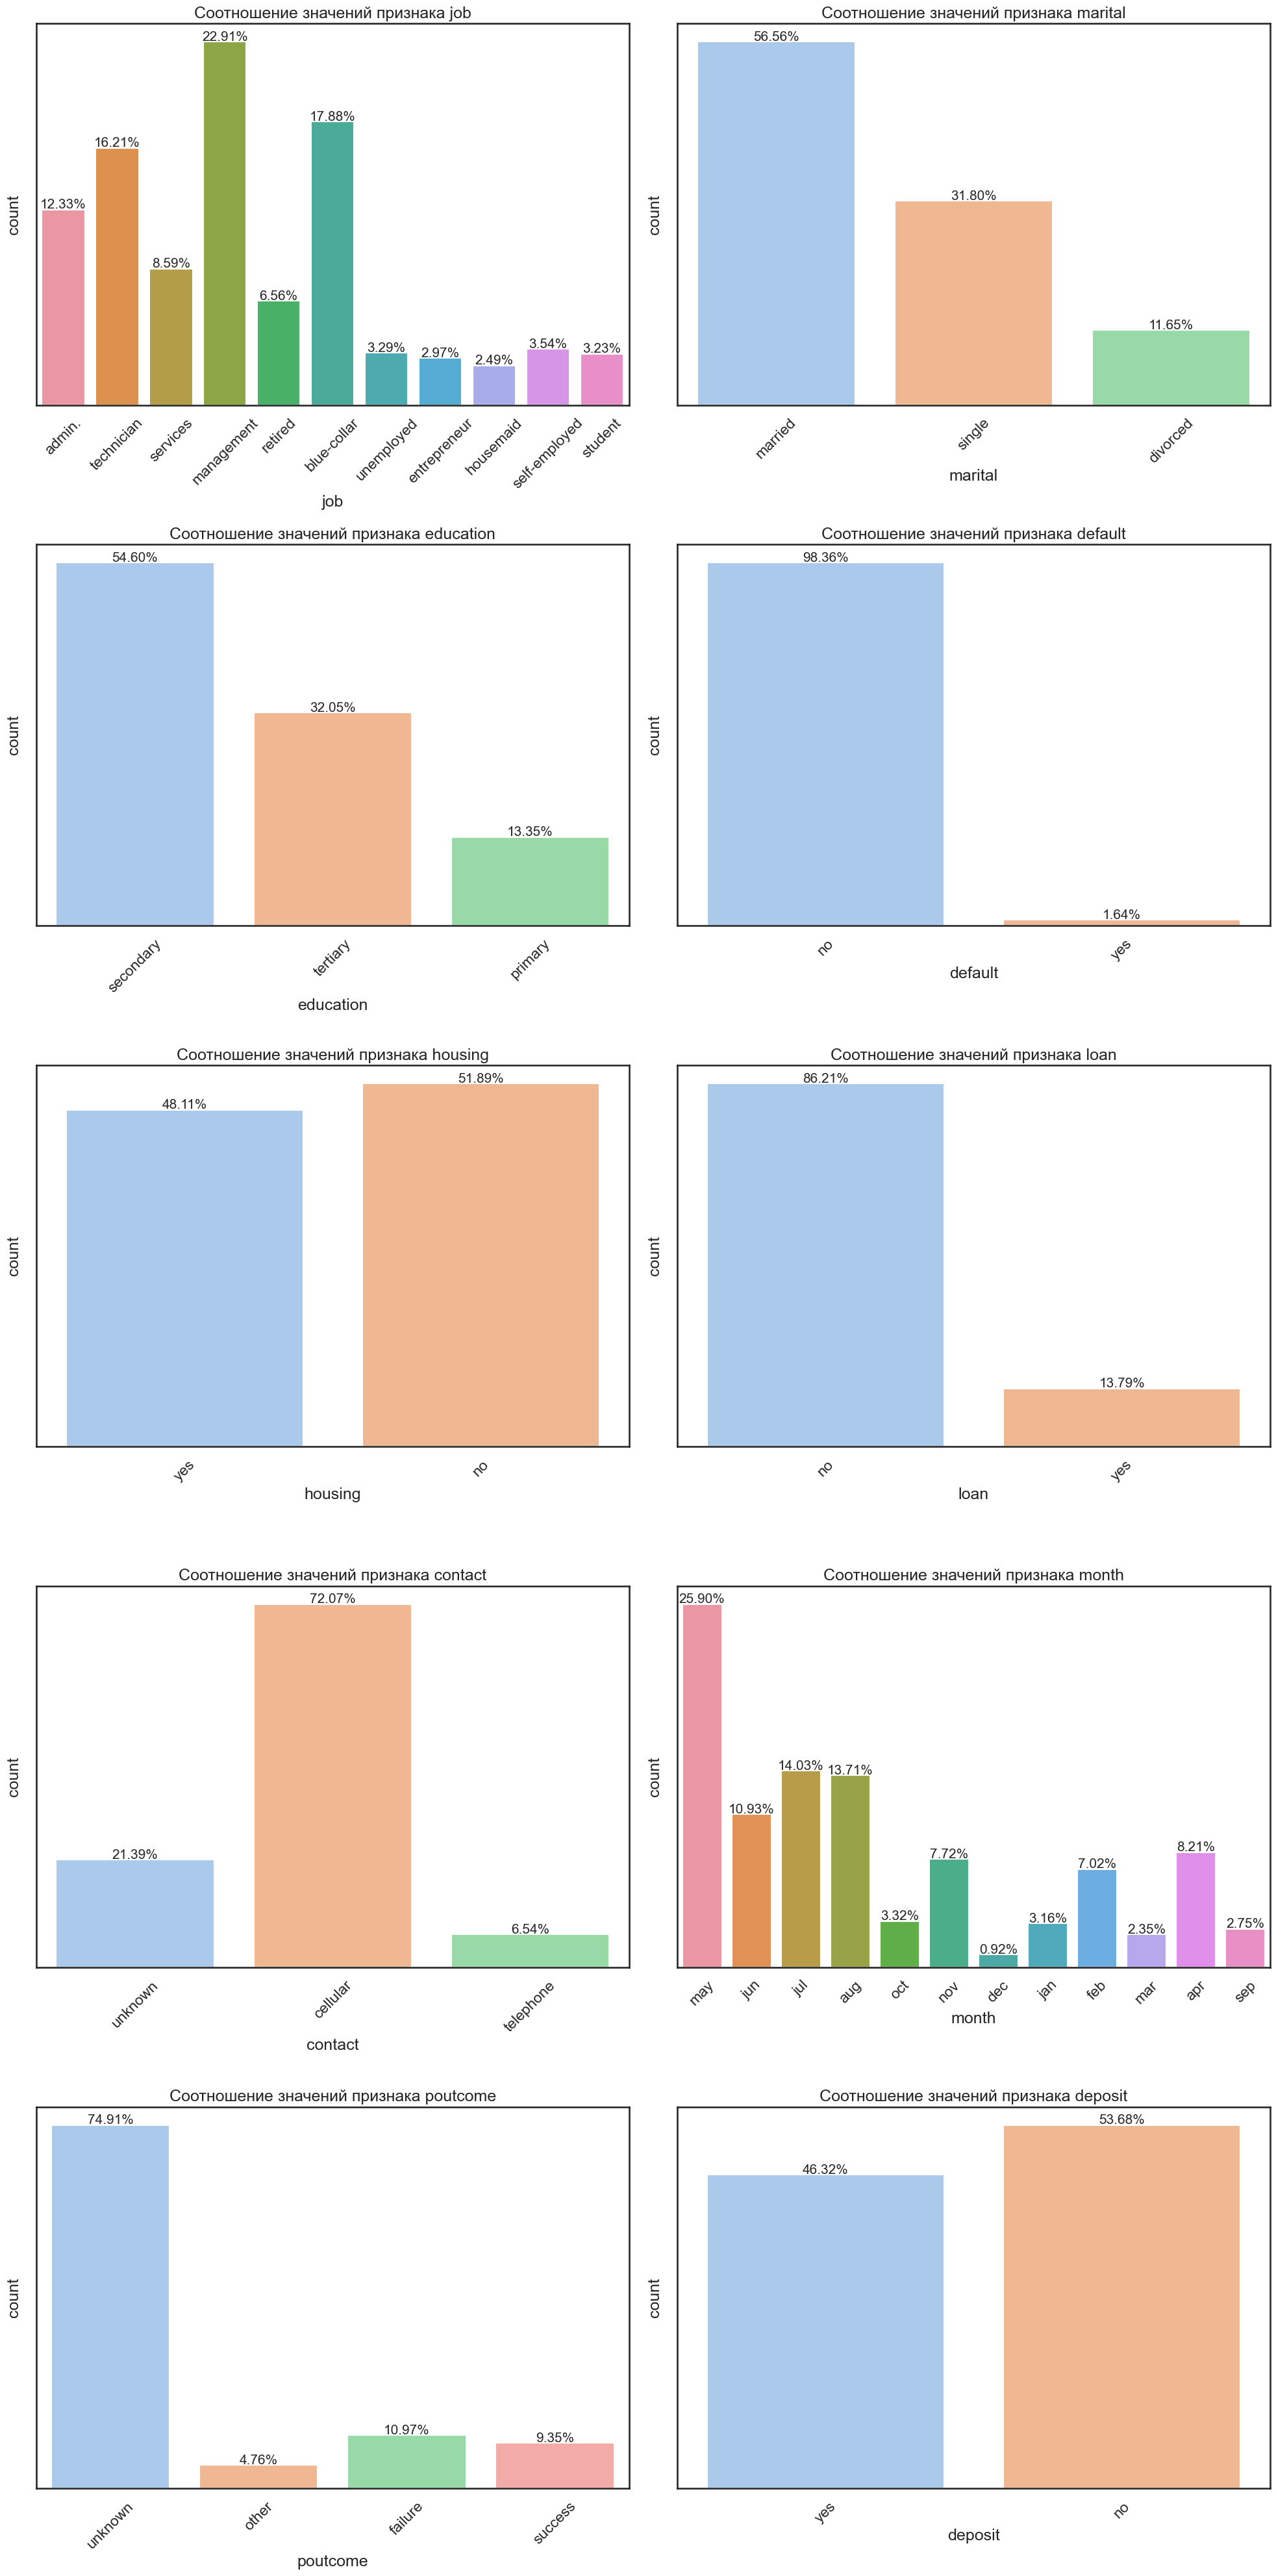

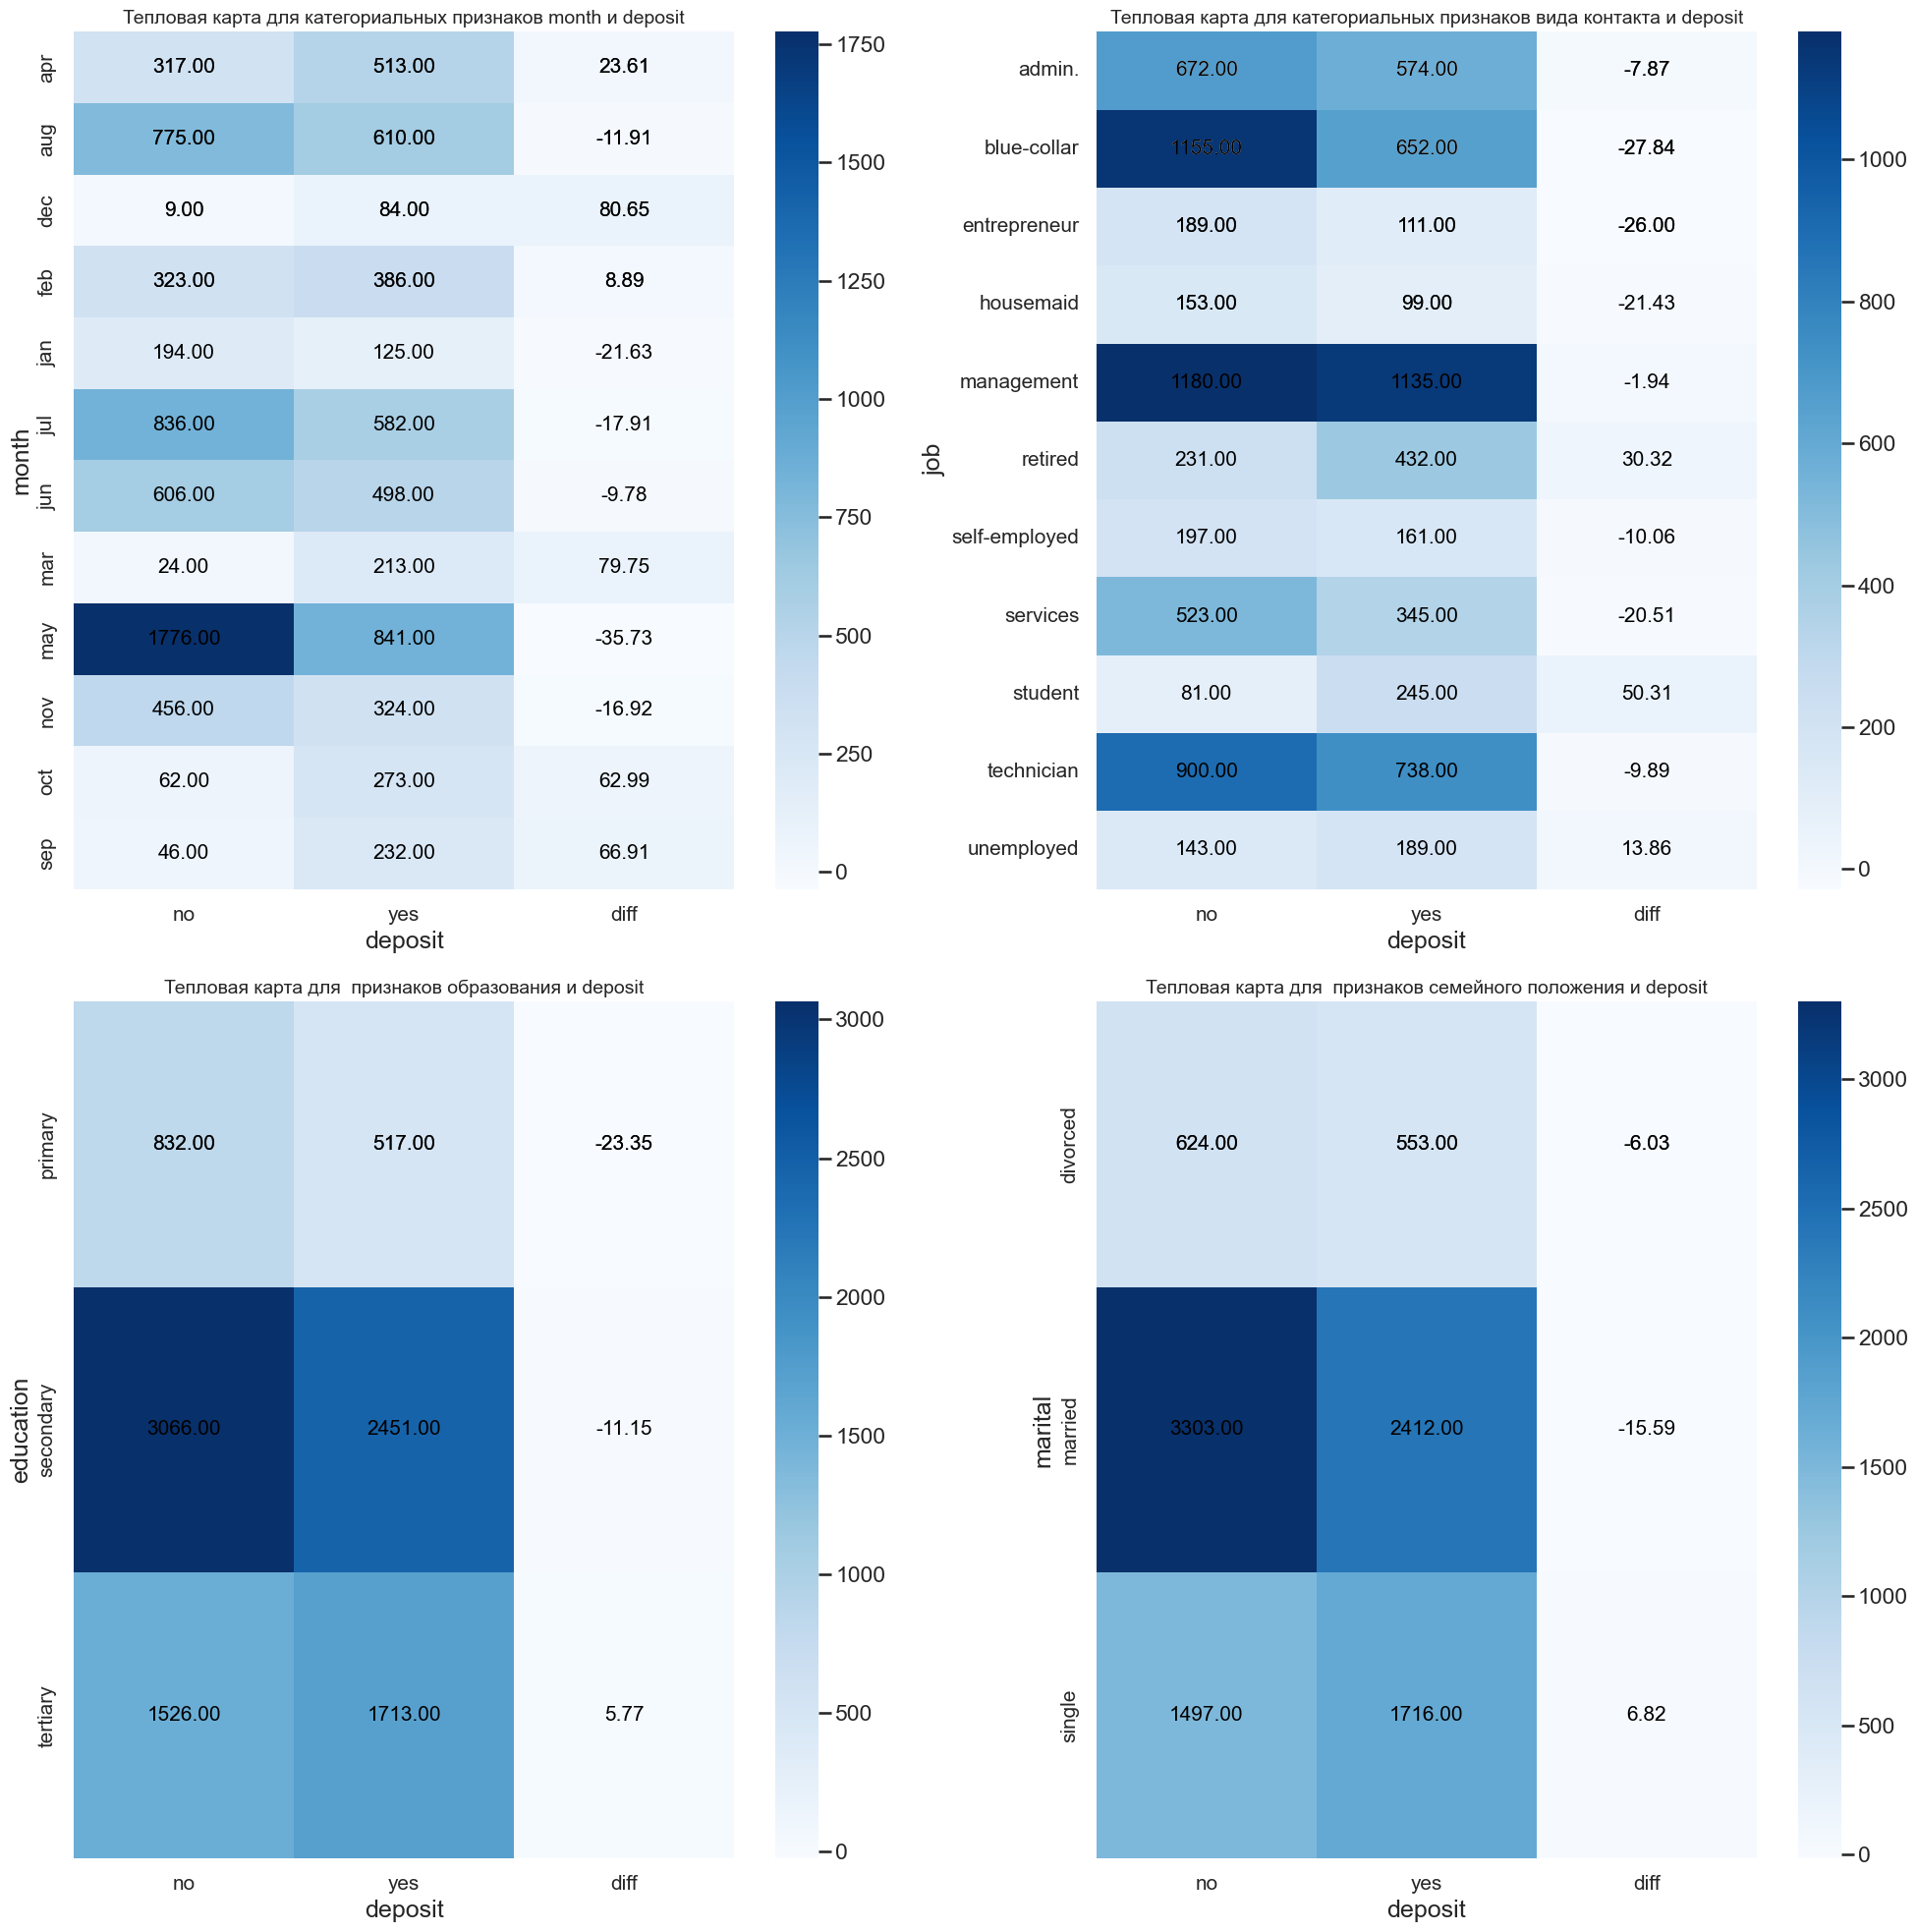

Максимальный возраст клиента банка: 95
Минимальная продолжительность разговора с клиентом банка в секундах: 2
Всего месяцев в которых проводилась маркетинговая кампания: 12
Всего сфер занятости среди клиентов банка: 11


In [11]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
desc_obj = df.describe(include = 'object')
display(desc_obj)

#постройте визуализации, иллюстрирующие результаты
cols = desc_obj.columns
l = int(len(cols)/2)
fig, axes = plt.subplots(l, 2, figsize = (20, l*8))

# Плоский массив для доступа к осям по одномерному индексу
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=df[col], ax = axes[i])
    axes[i].set_title(f'Соотношение значений признака {col}')

    
    # Добавление значений поверх столбцов
    total = len(df)
    for p in axes[i].patches:
        height = p.get_height()
        percentage = f'{height / total * 100:.2f}%'  # Форматирование процентов
        axes[i].annotate(percentage, 
                    xy=(p.get_x() + p.get_width() / 2, height), 
                    xytext=(0,5),  # Вертикальное смещение текста
                    textcoords='offset points', 
                    ha='center', va='center',
                    fontsize = 15)
    axes[i].tick_params(axis = 'x', rotation = 45)     # поворот меток оси
    axes[i].set_yticklabels([]) # убрать метки оси y
    
plt.tight_layout()
plt.show();



# Проверка зависимостей признаков с целевой меткой
fig, axes = plt.subplots(2, 2, figsize = (20, 20))
axes = axes.flatten()

# Соотношение целевой метки и месяца в котором был последний контакт
cross_tab_1 = pd.crosstab(df['month'], df['deposit'])
cross_tab_1['diff'] = ((cross_tab_1['yes'] - cross_tab_1['no']) / (cross_tab_1['yes'] + cross_tab_1['no']))*100
sns.heatmap(cross_tab_1, annot=True, fmt='.2f', cmap='Blues', annot_kws={'size': 15}, ax=axes[0])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_title('Тепловая карта для категориальных признаков month и deposit', fontsize=14)

# Перебираем аннотации и перемещаем их
for y in range(cross_tab_1.shape[0]):
    for x in range(cross_tab_1.shape[1]):
        axes[0].text(x + 0.5, y + 0.5, f'{cross_tab_1.iloc[y, x]:.2f}', 
                     horizontalalignment='center', 
                     verticalalignment='center', 
                     fontsize=15, color='black')

# Соотношение целевой метки и сферы занятости
cross_tab_2 = pd.crosstab(df['job'], df['deposit'])
cross_tab_2['diff'] = ((cross_tab_2['yes'] - cross_tab_2['no']) / (cross_tab_2['yes'] + cross_tab_2['no']))*100
sns.heatmap(data=cross_tab_2, annot=True, fmt='.2f', cmap='Blues', annot_kws={'size': 15}, ax=axes[1])
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].set_title('Тепловая карта для категориальных признаков вида контакта и deposit', fontsize=14)

# Перебираем аннотации и перемещаем их
for y in range(cross_tab_2.shape[0]):
    for x in range(cross_tab_2.shape[1]):
        axes[1].text(x + 0.5, y + 0.5, f'{cross_tab_2.iloc[y, x]:.2f}', 
                     horizontalalignment='center', 
                     verticalalignment='center', 
                     fontsize=15, color='black')

# Соотношение целевой метки и образования
cross_tab_3 = pd.crosstab(df['education'], df['deposit'])
cross_tab_3['diff'] = ((cross_tab_3['yes'] - cross_tab_3['no']) / (cross_tab_3['yes'] + cross_tab_3['no']))*100
sns.heatmap(data=cross_tab_3, annot=True, fmt='.2f', cmap='Blues', annot_kws={'size': 15}, ax=axes[2])
axes[2].tick_params(axis='x', labelsize=15)
axes[2].tick_params(axis='y', labelsize=15)
axes[2].set_title('Тепловая карта для  признаков образования и deposit', fontsize=14)

# Перебираем аннотации и перемещаем их
for y in range(cross_tab_3.shape[0]):
    for x in range(cross_tab_3.shape[1]):
        axes[2].text(x + 0.5, y + 0.5, f'{cross_tab_3.iloc[y, x]:.2f}', 
                     horizontalalignment='center', 
                     verticalalignment='center', 
                     fontsize=15, color='black')

# Соотношение целевой метки и семейного положения
cross_tab_4 = pd.crosstab(df['marital'], df['deposit'])
cross_tab_4['diff'] = ((cross_tab_4['yes'] - cross_tab_4['no']) / (cross_tab_4['yes'] + cross_tab_4['no']))*100
sns.heatmap(data=cross_tab_4, annot=True, fmt='.2f', cmap='Blues', annot_kws={'size': 15}, ax=axes[3])
axes[3].tick_params(axis='x', labelsize=15)
axes[3].tick_params(axis='y', labelsize=15)
axes[3].set_title('Тепловая карта для  признаков семейного положения и deposit', fontsize=14)

# Перебираем аннотации и перемещаем их
for y in range(cross_tab_4.shape[0]):
    for x in range(cross_tab_4.shape[1]):
        axes[3].text(x + 0.5, y + 0.5, f'{cross_tab_4.iloc[y, x]:.2f}', 
                     horizontalalignment='center', 
                     verticalalignment='center', 
                     fontsize=15, color='black')

plt.tight_layout()
plt.show();

# Ответы на вопросы
print(f'Максимальный возраст клиента банка: {df["age"].max()}')
print(f'Минимальная продолжительность разговора с клиентом банка в секундах: {df["duration"].min()}')
print(f'Всего месяцев в которых проводилась маркетинговая кампания: {df["month"].nunique()}')
print(f'Всего сфер занятости среди клиентов банка: {df["job"].nunique()}')

Из всех 10105 клиентов банка просроченный кредит (default) имеют всего  166 клиентов (1,6%), также кредит на личные нужды (loan) взяли всего 1393 то есть 14% клиентов. Значения этих признаков соотнесены несбаланморовано. Также обнаружено, что признаки результата прошлой маркетинговой кампании (poutcome) и (contact) тип контакта с клиентом имеют неявные пропуски в виде значения unknown, и в первом признаке он лидирует по количеству, составляя 75% признака, он не несет никакой информативной нагрузки, возможно стоит от признака poutcome полностью избавиться. Остальные признаки более или менее равномерно сбалансированы.

Можно отметить, что при анализе влияния таких признаков как: вид занятости, месяц года, семейное положение и образование на готовность клиента вложить депозит в банк, наблюдается что клиенты преклонного возраста, то есть находящиеся уже на пенсии, являющиеся студентами или безработные, а также одинокие или клиенты - холостяки, при этом вышеобразованные клиенты больше склонны согласиться на депозит и чаще позитивного ответа можно получить в такие месяца как март, декабрь, октябрь и сентябрь. Самый низкий показатель текущей кампании приходится на месяц май, возможно, этот месяц не является подходящим для проведения подобных акций.

При изучении разности между результатами предыдущей маркетинговой кампании и текущей, можно увидеть что 82% клиентов согласившихся на депозит в предыдущей кампании согласились и в текущей.

### Задание 6

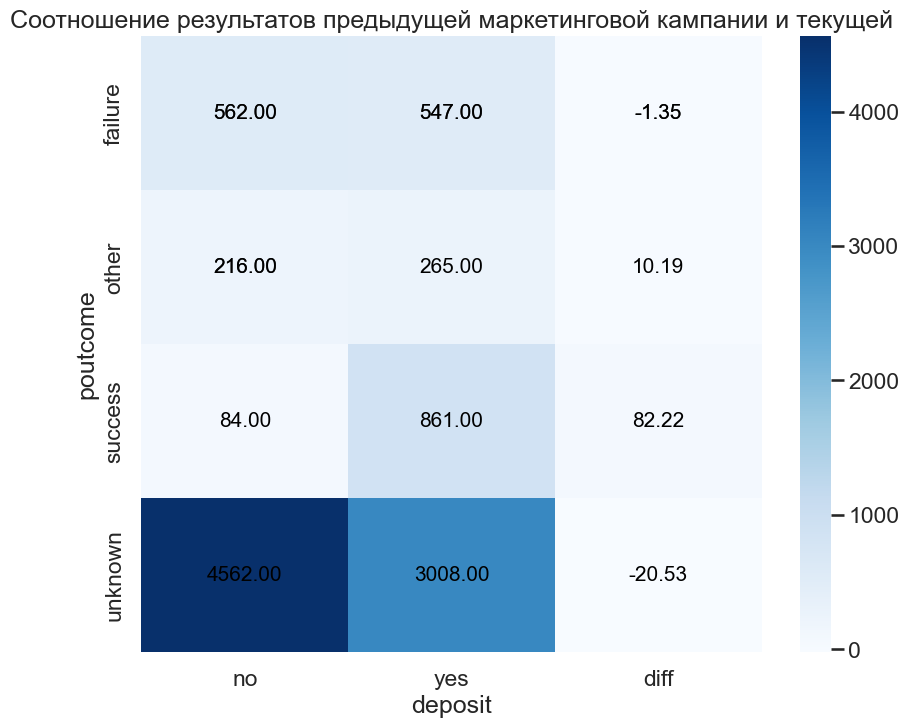

In [12]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
plt.figure(figsize = (10,8))
cross_tab = pd.crosstab(df['poutcome'], df['deposit'])
cross_tab['diff'] = ((cross_tab['yes'] - cross_tab['no']) / (cross_tab['yes'] + cross_tab['no']))*100
sns.heatmap(cross_tab, annot=True, fmt='.2f', cmap='Blues', annot_kws={'size': 15})
plt.title('Соотношение результатов предыдущей маркетинговой кампании и текущей')
for y in range(cross_tab.shape[0]):
    for x in range(cross_tab.shape[1]):
        plt.text(x + 0.5, y + 0.5, f'{cross_tab.iloc[y, x]:.2f}', 
                     horizontalalignment='center', 
                     verticalalignment='center', 
                     fontsize=15, color='black')
plt.show();

### Задание 7

Узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит.

Проиллюстрировано в задании 4 и 5. \
Ответ: месяц Май.

### Задание 8

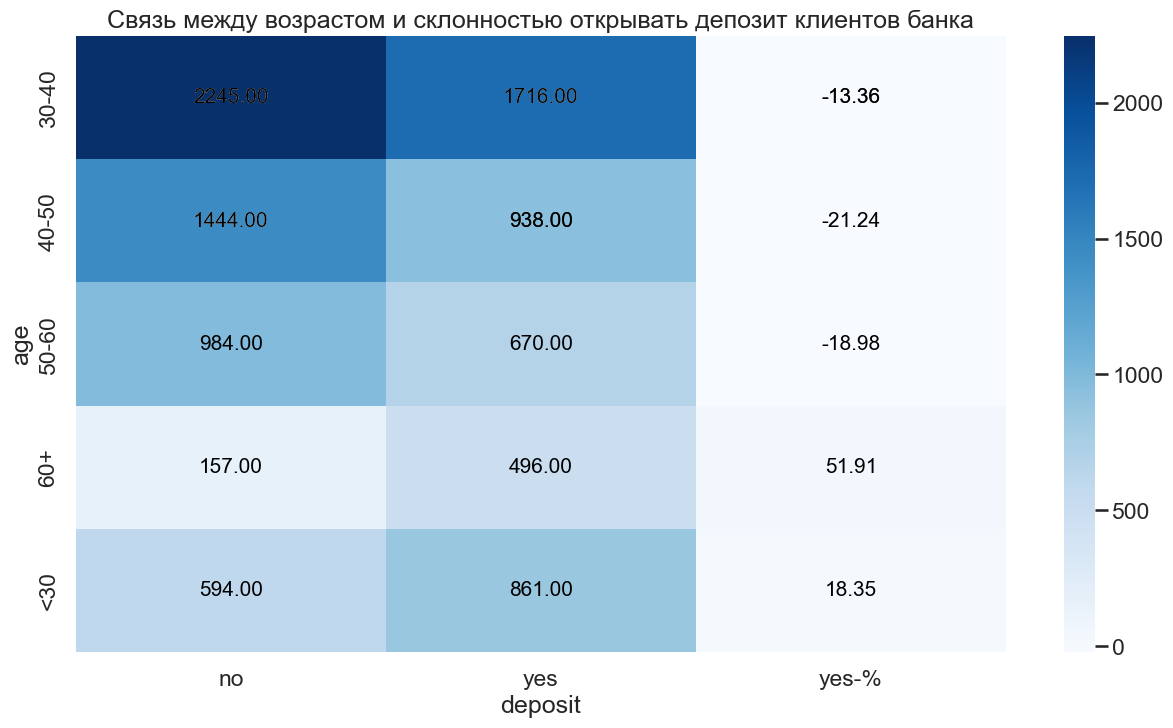

In [13]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
df['age'] = df['age'].apply(lambda x:
                          '<30' if x <30 else
                          '30-40' if x>=30 and x<40 else
                          '40-50' if x>=40 and x<50 else
                          '50-60' if x>=50 and x<60 else
                          '60+')

cross_tab = pd.crosstab(df['age'], df['deposit'])
cross_tab['yes-%'] = ((cross_tab['yes'] - cross_tab['no']) / (cross_tab['yes'] + cross_tab['no']))*100
plt.figure(figsize=(15,8))
sns.heatmap(cross_tab, annot=True, fmt='.2f', cmap='Blues', color = 'black', annot_kws={'size':15})
plt.title('Связь между возрастом и склонностью открывать депозит клиентов банка')

# Перебераем аннотации и перемещаем их
for y in range(cross_tab.shape[0]):
    for x in range(cross_tab.shape[1]):
        plt.text(x + 0.5, y + 0.5, f'{cross_tab.iloc[y,x]:.2f}',
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 15, color = 'black')
        
plt.show();

Снова подтверждается, что клиенты преклонного возраста 60+ и самые молодые среди наших категорий <30, как это было отображено при анализе сферы занятости в виде пенсионеров и студентов, склонны открывать депозит. 

### Задания 9 и 10

Постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса \
Построено и проиллюстрировано в задании 4 и 5.

Постройте визуализации для открывших и неоткрывших депозит в зависимости от образования \
Построено и проиллюстрировано в задании 4 и 5.

Постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости \
Построено и проиллюстрировано в задании 4 и 5.

### Задание 11

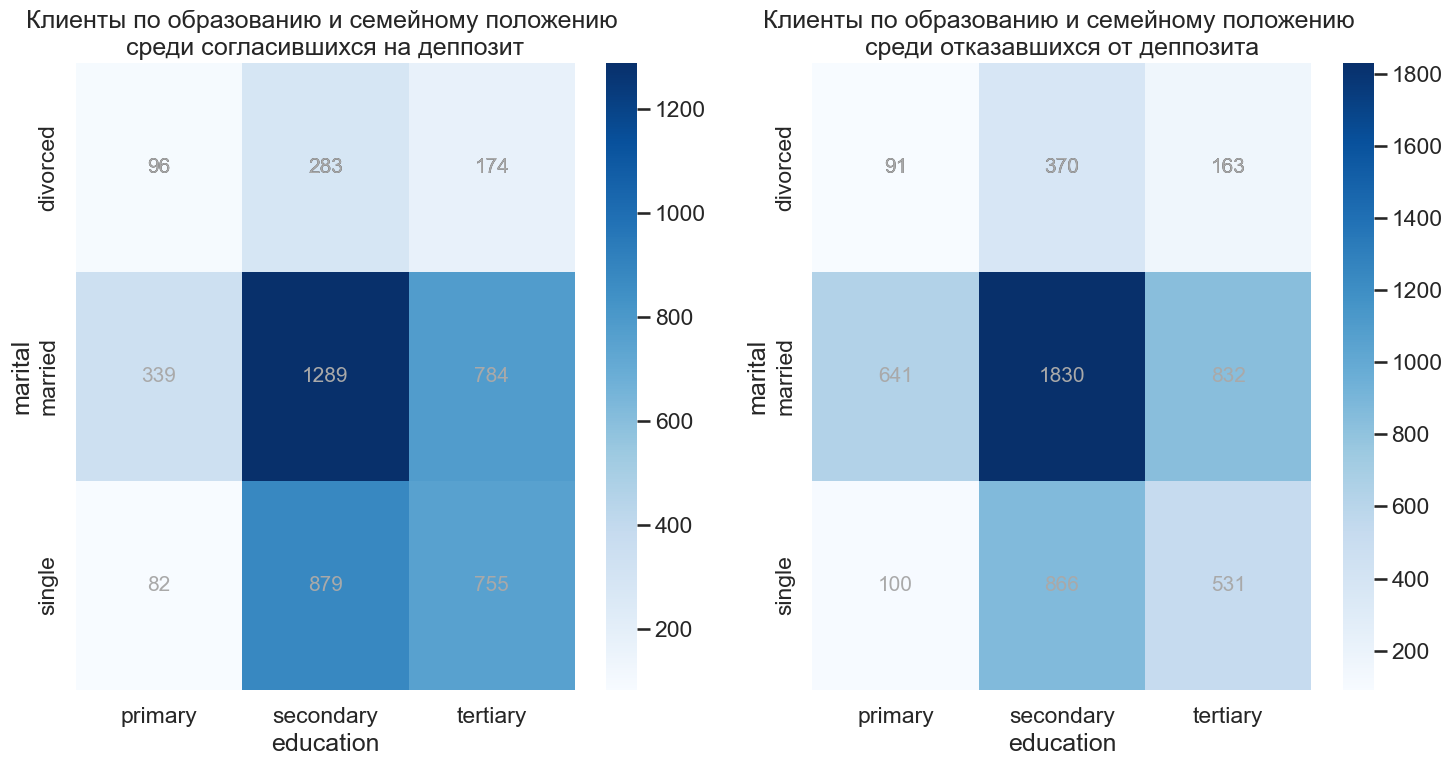

In [14]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

# Разделим таблицу на две части: для тех, кто открыл депозит, и для тех, кто не открыл. 
deposit_yes_df = df[df['deposit'] == 'yes']
deposit_no_df = df[df['deposit'] == 'no']

# Построим сводные диаграммы для каждой таблицы
pivot_yes = pd.pivot_table(deposit_yes_df, index='marital', columns='education', values='deposit', aggfunc = 'count')
pivot_no = pd.pivot_table(deposit_no_df, index='marital', columns='education', values='deposit', aggfunc='count')

# Строим сводные графики - теплокарты
fig, axes = plt.subplots(1, 2, figsize = (15,8))
axes = axes.flatten()

# Сводная таблица с клиентами согласившимися на депозит
sns.heatmap(pivot_yes, annot=True, fmt='d', cmap='Blues', color = 'darkgrey', annot_kws={'size':15}, ax=axes[0])
axes[0].set_title('Клиенты по образованию и семейному положению \nсреди согласившихся на деппозит')
for y in range(pivot_yes.shape[0]):
    for x in range(pivot_yes.shape[1]):
        axes[0].text(x + 0.5, y + 0.5, f'{pivot_yes.iloc[y,x]}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 15, color = 'darkgrey')


# Сводная таблица с клиентами отказавшимися от депозита
sns.heatmap(pivot_no, annot=True, fmt='d', cmap='Blues', color = 'darkgrey', annot_kws={'size':15}, ax=axes[1])
axes[1].set_title('Клиенты по образованию и семейному положению \nсреди отказавшихся от деппозита')
for y in range(pivot_no.shape[0]):
    for x in range(pivot_no.shape[1]):
        axes[1].text(x + 0.5, y + 0.5, f'{pivot_no.iloc[y,x]}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 15, color = 'darkgrey')

plt.tight_layout()
plt.show();

Популярность групп среди обоих категорий клиентов, то есть среди согласившихся и отказавшихся одинакова. Самая многочисленная группа среди ообеих категорий  является клиенты женатые (замужем) и со средним образованием. Наиболее малочисленные группы - разведенные с начальным  и высшим образованиями, а также одиночки с начальным образованием.

## Часть 3: преобразование данных

### Задание 1

In [15]:
# преобразуйте уровни образования
le = preprocessing.LabelEncoder()
le.fit(df['education'])
le.classes_
array_edu = le.transform(df['education'])
df['education'] = array_edu
print(f'Сумма значений признака education: {df["education"].sum()}')

le = preprocessing.LabelEncoder()
array_age = le.fit_transform(df['age'])
df['age_grou'] = array_age
df

Сумма значений признака education: 11995


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_grou
0,50-60,admin.,married,1,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,2
1,50-60,admin.,married,1,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,2
2,40-50,technician,married,1,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,50-60,services,married,1,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,2
4,50-60,admin.,married,2,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,30-40,blue-collar,single,0,no,1.0,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,0
10101,30-40,services,married,1,no,733.0,no,no,unknown,16,jun,83,4,-1,0,unknown,no,0
10102,30-40,technician,single,1,no,29.0,no,no,cellular,19,aug,156,2,-1,0,unknown,no,0
10103,40-50,technician,married,1,no,0.0,no,yes,cellular,8,may,9,2,172,5,failure,no,1


### Задания 2 и 3

In [16]:
features_bin=['deposit', 'default', 'housing', 'loan']
def get_bin_feture (data, feature):
    result = data[feature].apply(lambda x: 1 if x == 'yes' else 0)
    return result

for col in features_bin:
    df[col] = get_bin_feture (df, col)

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_grou
0,50-60,admin.,married,1,0,2343.0,1,0,unknown,5,may,1042,1,-1,0,unknown,1,2
1,50-60,admin.,married,1,0,45.0,0,0,unknown,5,may,1467,1,-1,0,unknown,1,2
2,40-50,technician,married,1,0,1270.0,1,0,unknown,5,may,1389,1,-1,0,unknown,1,1
3,50-60,services,married,1,0,2476.0,1,0,unknown,5,may,579,1,-1,0,unknown,1,2
4,50-60,admin.,married,2,0,184.0,0,0,unknown,5,may,673,2,-1,0,unknown,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,30-40,blue-collar,single,0,0,1.0,1,0,cellular,20,apr,257,1,-1,0,unknown,0,0
10101,30-40,services,married,1,0,733.0,0,0,unknown,16,jun,83,4,-1,0,unknown,0,0
10102,30-40,technician,single,1,0,29.0,0,0,cellular,19,aug,156,2,-1,0,unknown,0,0
10103,40-50,technician,married,1,0,0.0,0,1,cellular,8,may,9,2,172,5,failure,0,1


In [17]:
# преобразуйте бинарные переменные в представление из нулей и единиц
features_dumm = [ 'job', 'marital', 'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df[features_dumm])
df = pd.concat([df, df_encoded], axis=1)

# Ответ на задание 
print(df['deposit'].std().__round__(3));

0.499


### Задание 4

In [18]:
# создайте дамми-переменные

sum_avg = df['default'].mean() + df['housing'].mean() + df['loan'].mean()
print(f'Ответ на задание 4.3: {sum_avg:.3f}')
print(f'Число признаков в датасете: {df.shape[1]}')
df

Ответ на задание 4.3: 0.635
Число признаков в датасете: 51


,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,50-60,admin.,married,1,0,2343.0,1,0,unknown,5,...,False,False,True,False,False,False,False,False,False,True
1,50-60,admin.,married,1,0,45.0,0,0,unknown,5,...,False,False,True,False,False,False,False,False,False,True
2,40-50,technician,married,1,0,1270.0,1,0,unknown,5,...,False,False,True,False,False,False,False,False,False,True
3,50-60,services,married,1,0,2476.0,1,0,unknown,5,...,False,False,True,False,False,False,False,False,False,True
4,50-60,admin.,married,2,0,184.0,0,0,unknown,5,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,30-40,blue-collar,single,0,0,1.0,1,0,cellular,20,...,False,False,False,False,False,False,False,False,False,True
10101,30-40,services,married,1,0,733.0,0,0,unknown,16,...,True,False,False,False,False,False,False,False,False,True
10102,30-40,technician,single,1,0,29.0,0,0,cellular,19,...,False,False,False,False,False,False,False,False,False,True
10103,40-50,technician,married,1,0,0.0,0,1,cellular,8,...,False,False,True,False,False,False,True,False,False,False


### Задания 5 и 6

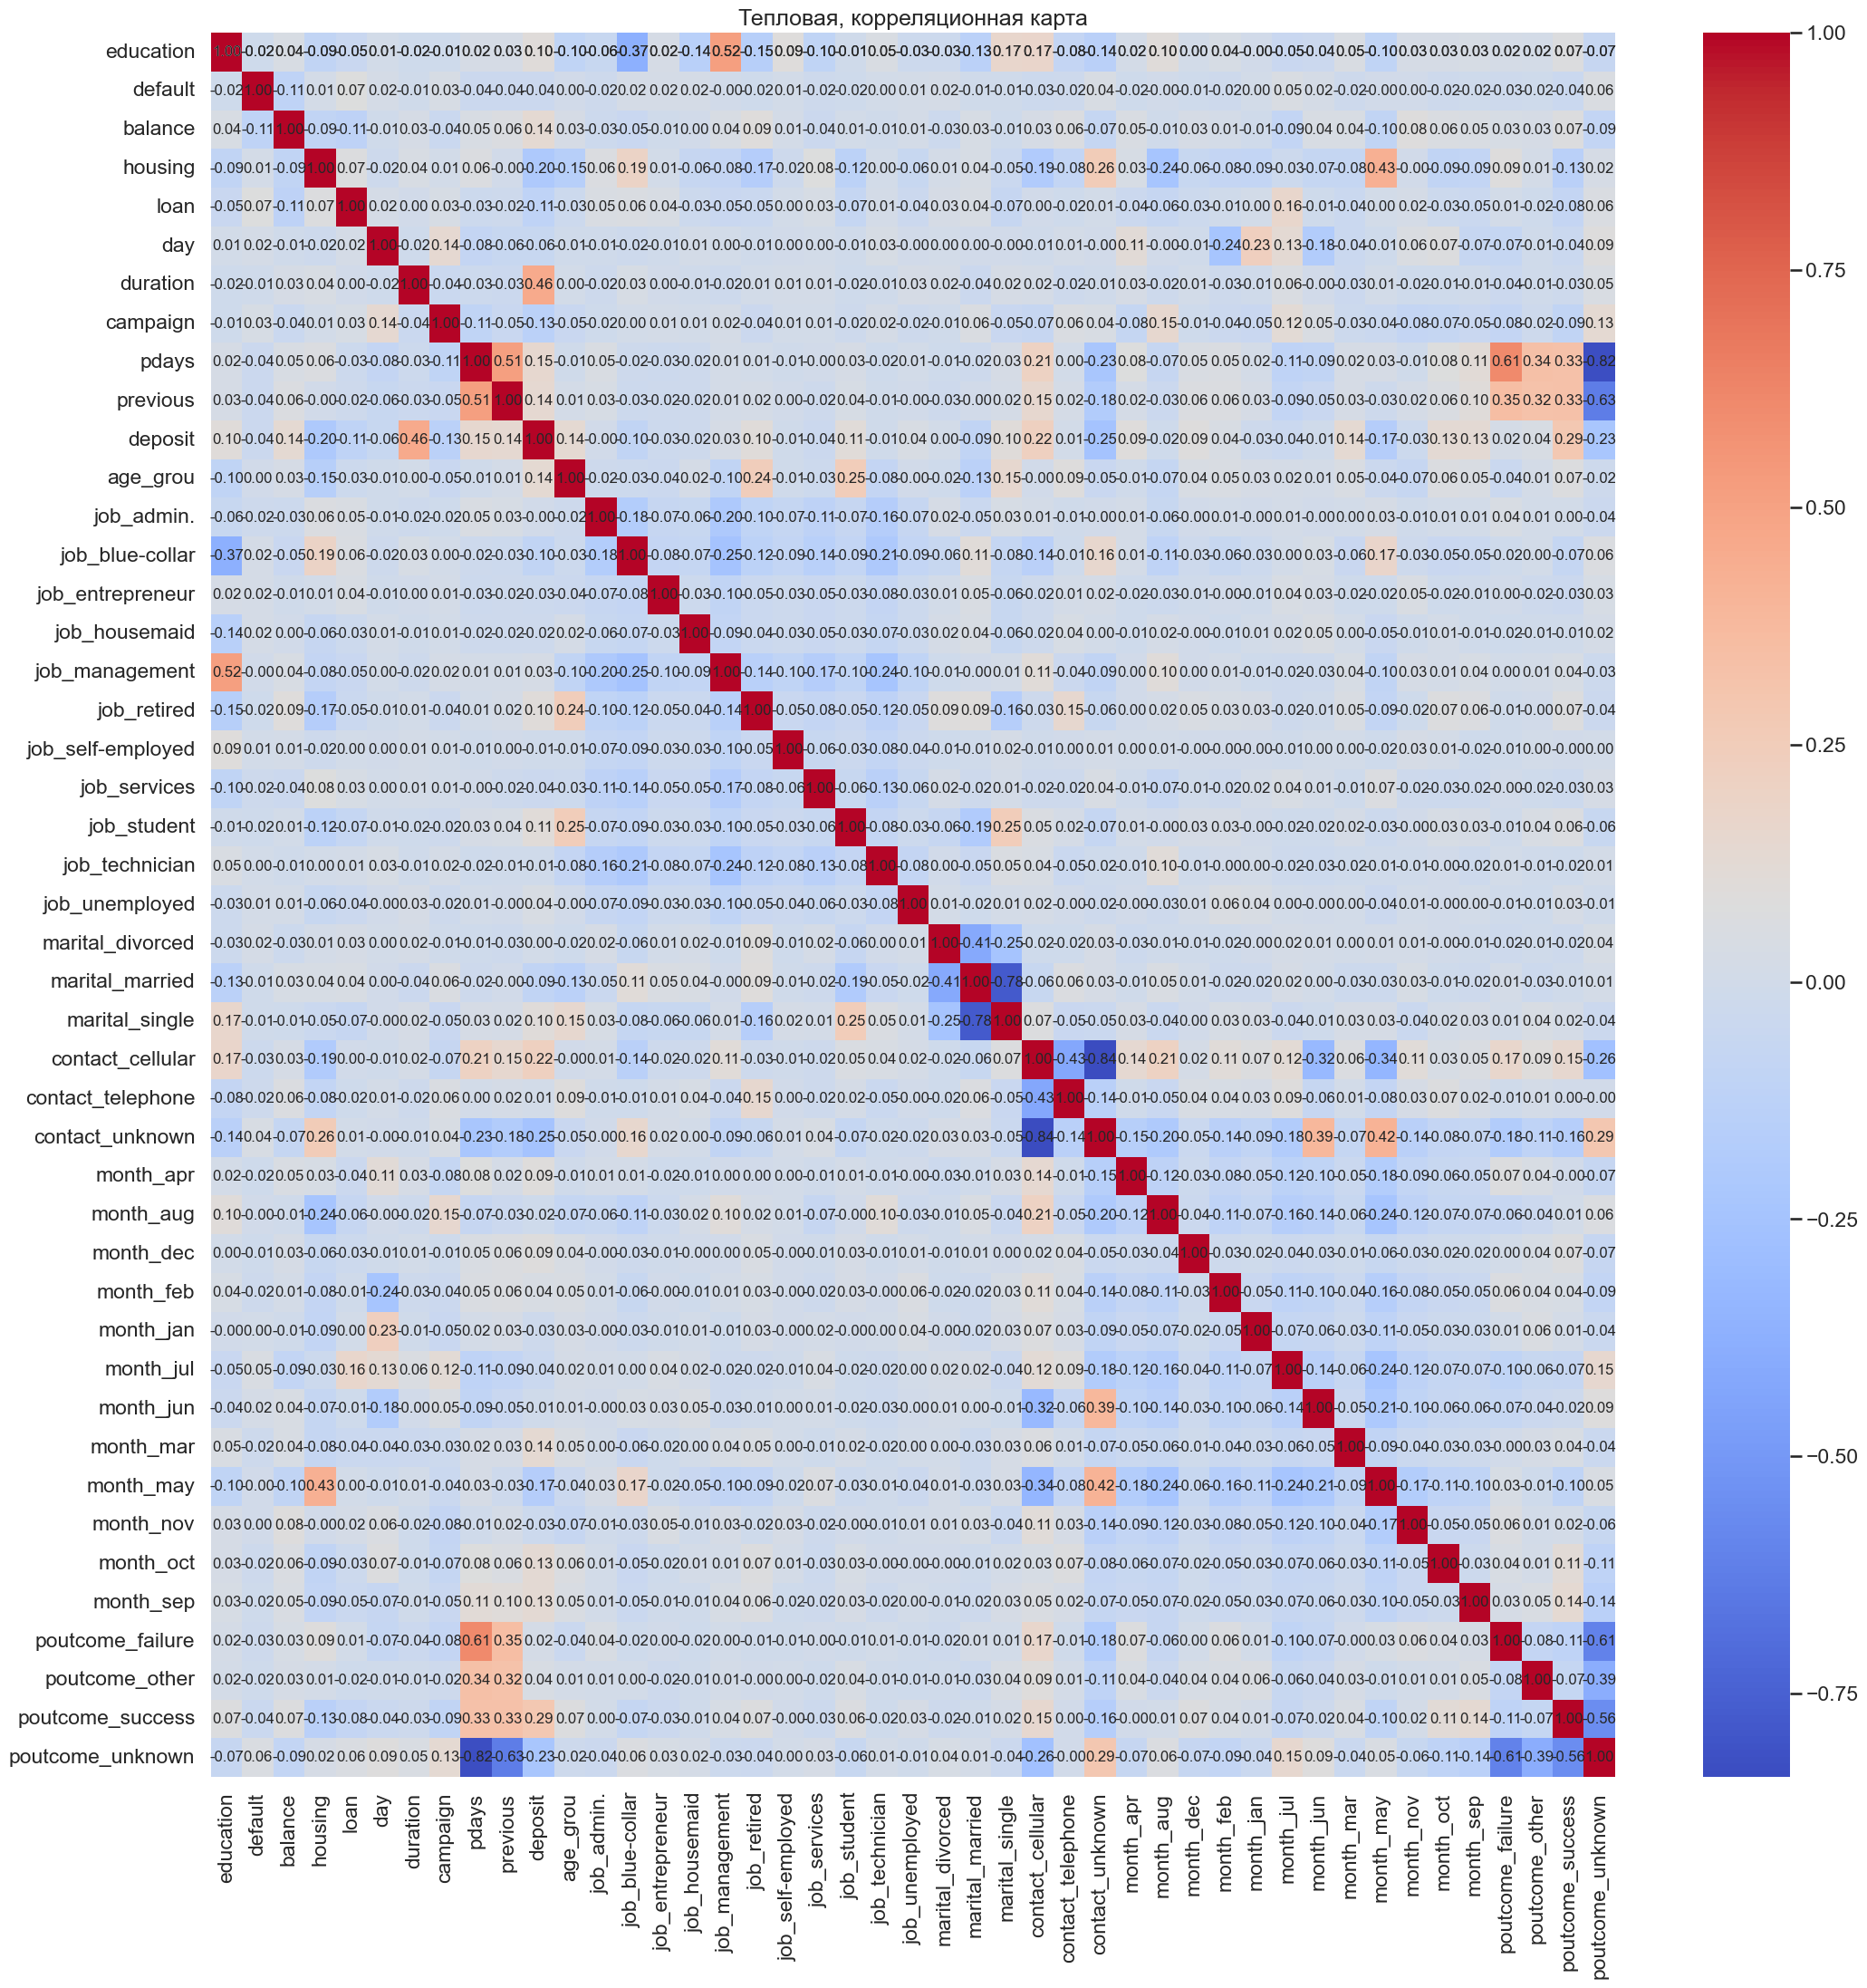

In [19]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
corr = df.corr(numeric_only = True)
plt.figure(figsize = (25,25))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap='coolwarm',  annot_kws = {'size': 12})
plt.title('Тепловая, корреляционная карта')
for y in range(corr.shape[0]):
    for x in range(corr.shape[1]):
        plt.text(x + 0.5, y + 0.5, f'{corr.iloc[x,y]:.2f}',
                horizontalalignment = 'center',
                verticalalignment = 'center',
                fontsize = 12)
plt.show();

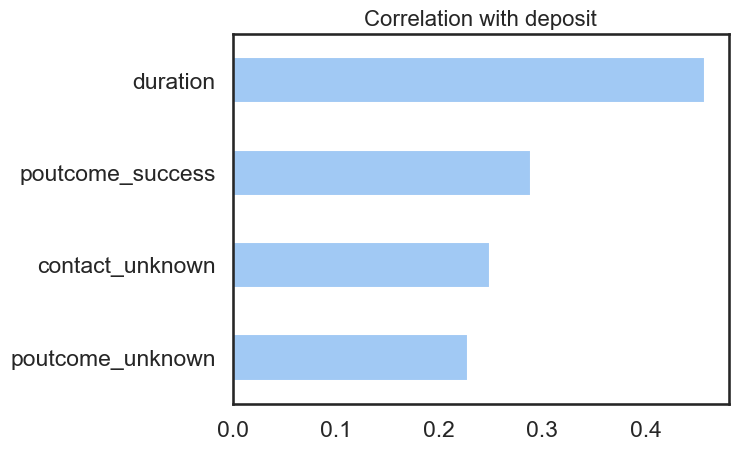

In [20]:
corr["deposit"].apply(lambda x: abs(x)).sort_values()[-5:-1].plot.barh()
plt.title("Correlation with deposit", fontsize = 16)
plt.show();

In [21]:
df = df.select_dtypes(exclude = ['object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10105 entries, 0 to 10104
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   education          10105 non-null  int32  
 1   default            10105 non-null  int64  
 2   balance            10105 non-null  float64
 3   housing            10105 non-null  int64  
 4   loan               10105 non-null  int64  
 5   day                10105 non-null  int64  
 6   duration           10105 non-null  int64  
 7   campaign           10105 non-null  int64  
 8   pdays              10105 non-null  int64  
 9   previous           10105 non-null  int64  
 10  deposit            10105 non-null  int64  
 11  age_grou           10105 non-null  int32  
 12  job_admin.         10105 non-null  bool   
 13  job_blue-collar    10105 non-null  bool   
 14  job_entrepreneur   10105 non-null  bool   
 15  job_housemaid      10105 non-null  bool   
 16  job_management     101

### Задания 7 и 8

In [22]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [52]:
# рассчитайте необходимые показатели
print(X_test.shape)
y_test.mean().__round__(2)

(3335, 15)


0.46

### Задание 9

In [24]:
X_train.shape

(6770, 44)

In [55]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
SB = SelectKBest(score_func = f_classif, k = 15)
X_train_new = SB.fit_transform(X_train, y_train)
X_test_new = SB.transform(X_test)
X_train_new = X_train[SB.get_feature_names_out()]
X_test_new =  X_test[SB.get_feature_names_out()]

display(X_train_new)
display(X_test_new)


print('\n'.join(X_train_new.columns))

,balance,housing,duration,campaign,pdays,previous,age_grou,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
0,0.426374,1.0,0.131735,0.000000,0.000000,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.346531,0.0,0.075793,0.000000,0.240936,0.034483,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.335242,1.0,0.102346,0.023810,0.419883,0.086207,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.407886,0.0,0.034803,0.000000,0.120468,0.086207,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.571499,0.0,0.025264,0.000000,0.138012,0.137931,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,0.371564,0.0,0.028100,0.000000,0.239766,0.034483,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6766,0.625982,1.0,0.204692,0.095238,0.181287,0.017241,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6767,0.879090,0.0,0.030936,0.000000,0.108772,0.051724,0.75,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6768,0.369437,0.0,0.155452,0.023810,0.000000,0.000000,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,balance,housing,duration,campaign,pdays,previous,age_grou,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
0,0.360602,0.0,0.074246,0.000000,0.109942,0.034483,0.75,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.419012,0.0,0.017530,0.000000,0.000000,0.000000,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.564791,0.0,0.054653,0.166667,0.382456,0.034483,0.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.543030,0.0,0.059294,0.047619,0.000000,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.510962,1.0,0.134313,0.023810,0.000000,0.000000,0.50,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,0.418194,0.0,0.097448,0.000000,0.000000,0.000000,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3331,0.407723,0.0,0.002062,0.000000,0.003509,0.017241,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3332,0.284359,1.0,0.013663,0.023810,0.404678,0.034483,0.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3333,0.376145,0.0,0.033772,0.000000,0.000000,0.000000,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


balance
housing
duration
campaign
pdays
previous
age_grou
contact_cellular
contact_unknown
month_mar
month_may
month_oct
month_sep
poutcome_success
poutcome_unknown


### Задание 10

In [56]:
# нормализуйте данные с помощью minmaxsxaler
from sklearn.preprocessing import MinMaxScaler

MMScaler = MinMaxScaler()
X_train = MMScaler.fit_transform(X_train_new)
X_test = MMScaler.transform(X_test_new)

# Преобразуем массив данных в Датафреймы
X_train = pd.DataFrame(data = X_train, columns = MMScaler.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns = MMScaler.get_feature_names_out())
display(X_train)

# Ответ на задание 4.10
print(X_train['balance'].mean().__round__(2))

,balance,housing,duration,campaign,pdays,previous,age_grou,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
0,0.426374,1.0,0.131735,0.000000,0.000000,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.346531,0.0,0.075793,0.000000,0.240936,0.034483,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.335242,1.0,0.102346,0.023810,0.419883,0.086207,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.407886,0.0,0.034803,0.000000,0.120468,0.086207,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.571499,0.0,0.025264,0.000000,0.138012,0.137931,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,0.371564,0.0,0.028100,0.000000,0.239766,0.034483,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6766,0.625982,1.0,0.204692,0.095238,0.181287,0.017241,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6767,0.879090,0.0,0.030936,0.000000,0.108772,0.051724,0.75,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6768,0.369437,0.0,0.155452,0.023810,0.000000,0.000000,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


0.47


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [63]:
# обучите логистическую регрессию и рассчитайте метрики качества
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42, solver='sag', max_iter=1000, n_jobs=1)

LR.fit(X_train, y_train)

y_train_pred = LR.predict(X_train)
y_pred = LR.predict(X_test)




print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred).__round__(2))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      3634
           1       0.84      0.76      0.80      3136

    accuracy                           0.82      6770
   macro avg       0.83      0.82      0.82      6770
weighted avg       0.83      0.82      0.82      6770

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.73      0.78      1545

    accuracy                           0.80      3335
   macro avg       0.81      0.80      0.80      3335
weighted avg       0.81      0.80      0.80      3335

0.8


### Задания 2,3,4

In [64]:
# обучите решающие деревья, настройте максимальную глубину
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion ='entropy', random_state = 42, max_depth = 6) 
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3634
           1       0.78      0.85      0.81      3136

    accuracy                           0.82      6770
   macro avg       0.82      0.82      0.82      6770
weighted avg       0.82      0.82      0.82      6770

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1790
           1       0.77      0.84      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.81      0.81      0.81      3335



### Задание 5

In [31]:
# подберите оптимальные параметры с помощью gridsearch
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_leaf' : [2, 5, 7, 10],
             'max_depth' : [3, 5, 7]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                 param_grid = param_grid,
                 return_train_score = True,
                 )
grid_search.fit(X_train, y_train)

# Выводим лучшие гиперпараметры и лучшую точность
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.2f}')

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 10}
Best Accuracy: 0.82


In [70]:
model = DecisionTreeClassifier(max_depth=7,
                              min_samples_leaf=10,
                              random_state=42,
                              criterion = 'entropy')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_pred))
# print(f'Значение метрики F1-score: {metrics.f1_score(y_test, y_pred).__round__(2)}')

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3634
           1       0.81      0.84      0.82      3136

    accuracy                           0.83      6770
   macro avg       0.83      0.83      0.83      6770
weighted avg       0.83      0.83      0.83      6770

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1790
           1       0.79      0.82      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [67]:
# обучите на ваших данных случайный лес
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100,
                              criterion = 'gini',
                              min_samples_leaf = 5,
                              max_depth = 10,
                              random_state = 42)

model.fit(X_train, y_train)

# Предскажем метки на тестовой выборке и расчитаем метрики
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_pred))
print(f'Метрика F1_score: {metrics.f1_score(y_test, y_pred).__round__(2)}')

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3634
           1       0.84      0.86      0.85      3136

    accuracy                           0.86      6770
   macro avg       0.86      0.86      0.86      6770
weighted avg       0.86      0.86      0.86      6770

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335

Метрика F1_score: 0.82


### Задания 2 и 3

In [68]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(learning_rate = 0.05,
                                n_estimators = 300, 
                                min_samples_leaf = 5,
                                max_depth = 5,
                                random_state = 42)
GBC.fit(X_train, y_train)

y_train_pred = GBC.predict(X_train)
y_pred = GBC.predict(X_test)

print(metrics.classification_report(y_train, y_train_pred))
# print(f'Метрика F1_score: {metrics.f1_score(y_test, y_pred).__round__(2)}')
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3634
           1       0.87      0.89      0.88      3136

    accuracy                           0.89      6770
   macro avg       0.89      0.89      0.89      6770
weighted avg       0.89      0.89      0.89      6770

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задание 4

In [72]:
# объедините уже известные вам алгоритмы с помощью стекинга 
from sklearn.ensemble import StackingClassifier

estimators = [('lr', LogisticRegression(random_state=42, solver='sag', max_iter=1000, n_jobs=1)),
             ('dtc', DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, random_state=42, criterion = 'entropy')),
             ('gbc', GradientBoostingClassifier(learning_rate = 0.05, n_estimators = 300, min_samples_leaf = 5, max_depth = 5, random_state = 42))]
stac_model = StackingClassifier(estimators = estimators,
                               final_estimator = LogisticRegression(random_state=42, 
                                                                    solver='sag', 
                                                                    max_iter=1000, 
                                                                    n_jobs=1)
                               )
stac_model.fit(X_train, y_train)

# Предсказываем ответы на тестовой выборке и расчитываем метрики
y_train_pred = stac_model.predict(X_train)
y_pred = stac_model.predict(X_test)

print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3634
           1       0.86      0.86      0.86      3136

    accuracy                           0.87      6770
   macro avg       0.87      0.87      0.87      6770
weighted avg       0.87      0.87      0.87      6770

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1790
           1       0.81      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



In [71]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

# Получение списка имен отобранных признаков
selected_feature_names = X_train.columns

# Получение важности признаков
importance = GBC.feature_importances_

# Сортировка признаков по их важности
indices = np.argsort(importance)[::-1]

# Вывод важности признаков
print("Feature importance:")
for f in range(X_train.shape[1]):
    print(f"{selected_feature_names[indices[f]]}: {importance[indices[f]]}")

Feature importance:
duration: 0.50198685987414
poutcome_success: 0.11626370100249661
contact_unknown: 0.07376167754018609
balance: 0.059764354955215045
pdays: 0.05564682208682316
housing: 0.046583367682483584
age_grou: 0.04210175349754449
month_mar: 0.026144241513862628
month_oct: 0.018823711273960014
campaign: 0.017100726266917946
month_may: 0.014507747393188983
month_sep: 0.013427506066882502
previous: 0.00890089467652082
contact_cellular: 0.004600136959252884
poutcome_unknown: 0.00038649921052513406


### Задание 5

### Задания 6,7,8

In [ ]:
# !pip install optuna

In [73]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
import optuna

def optuna_rf (trial):
    # Задаём пространства поиска гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

    model = RandomForestClassifier(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  min_samples_leaf = min_samples_leaf,
                                  random_state = 42)
    # Обучаем модель
    model.fit(X_train, y_train)
    score = metrics.f1_score(y_test, model.predict(X_test))

    return score  
    


In [74]:
%%time
# Создаём объект исследования
study = optuna.create_study(study_name = 'RandomForestClassifier', direction = 'maximize')
# Ищем наилучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials = 40)

[I 2024-06-30 23:15:58,489] A new study created in memory with name: RandomForestClassifier
[I 2024-06-30 23:16:00,095] Trial 0 finished with value: 0.8138062064597846 and parameters: {'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8138062064597846.
[I 2024-06-30 23:16:01,025] Trial 1 finished with value: 0.8135916163861543 and parameters: {'n_estimators': 156, 'max_depth': 14, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8138062064597846.
[I 2024-06-30 23:16:02,023] Trial 2 finished with value: 0.818867924528302 and parameters: {'n_estimators': 162, 'max_depth': 29, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.818867924528302.
[I 2024-06-30 23:16:03,416] Trial 3 finished with value: 0.8170347003154574 and parameters: {'n_estimators': 185, 'max_depth': 18, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.818867924528302.
[I 2024-06-30 23:16:04,356] Trial 4 finished with value: 0.8119821542383683 and parameters: {'n_es

CPU times: total: 40.9 s
Wall time: 49.6 s


In [75]:
print(f'Наилучшая комбинация гиперпараметров {study.best_params}')
print('Метрика F1 на тестовой выборке {:.2f}'.format(study.best_value))

Наилучшая комбинация гиперпараметров {'n_estimators': 194, 'max_depth': 28, 'min_samples_leaf': 6}
Метрика F1 на тестовой выборке 0.82


In [76]:
RF = RandomForestClassifier(n_estimators= 134, 
                            max_depth = 14, 
                            min_samples_leaf = 2,
                           random_state =42)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
y_train_pred = RF.predict(X_train)
# print('F1_scre: {:.2f}'.format(metrics.f1_score(y_test, y_pred)))

print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      3634
           1       0.88      0.90      0.89      3136

    accuracy                           0.90      6770
   macro avg       0.90      0.90      0.90      6770
weighted avg       0.90      0.90      0.90      6770

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1790
           1       0.80      0.84      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335

